In [3]:
import os, struct
import math, random, copy
import numpy as np
import sys
from scipy import misc
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pandas as pd
import mnist
import scipy.misc

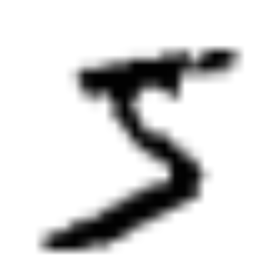

In [4]:
images = mnist.train_images()
scipy.misc.toimage(scipy.misc.imresize(images[0,:,:] * -1 + 256, 10.))


In [5]:
im_of_20 = np.zeros((20, 28, 28))

In [6]:
im_of_20_flip = np.zeros((20, 28, 28))

In [7]:
for i in range(20): #get the first 20 images to work with
    im_of_20[i,:,:] = images[i,:,:]

In [8]:
noise_df = np.loadtxt("NoiseCoordinates.csv", delimiter= ',',  usecols=range(1,16), skiprows=1)

In [9]:
im_of_20_map = np.where(im_of_20 < 0.5 ,0,1)

In [10]:
im_of_20_map[0,21,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [11]:
noise_df.shape

(40, 15)

In [12]:
im_of_20_flip = im_of_20_map

In [13]:
for i in range(20):
    for j in range(15):
        if im_of_20_flip[i,noise_df[i*2,j],noise_df[i*2+1,j]] == 1:
            im_of_20_flip[i,noise_df[i*2,j],noise_df[i*2+1,j]] = 0
        else:
            im_of_20_flip[i,noise_df[i*2,j],noise_df[i*2+1,j]] = 1

C:\Users\titus\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Users\titus\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\titus\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


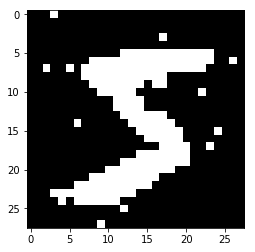

In [45]:
plt.imshow(im_of_20_map[0,:,:].astype(np.float64),cmap='gray')
plt.show()

In [15]:
im_of_20_map[0,:,:].shape

(28, 28)

In [16]:
import copy

In [17]:
initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',')

In [72]:
initial_df

array([[ 0.16300214,  0.94316862,  0.96634146,  0.10651438,  0.26554397,
         0.34707835,  0.67709336,  0.02912923,  0.15127202,  0.59990637,
         0.73833034,  0.83619068,  0.2893352 ,  0.65670935,  0.87977655,
         0.16016019,  0.23492615,  0.11374673,  0.28475778,  0.31280987,
         0.93402849,  0.15177695,  0.8826161 ,  0.71386387,  0.17587459,
         0.01110196,  0.41407671,  0.61636517],
       [ 0.40710576,  0.82578904,  0.82286658,  0.00924469,  0.88895483,
         0.29499995,  0.97541   ,  0.1424434 ,  0.79675955,  0.60710713,
         0.66467161,  0.86486237,  0.34308286,  0.66699751,  0.9461347 ,
         0.59839563,  0.9245649 ,  0.37260699,  0.3717223 ,  0.48294116,
         0.31698619,  0.8433582 ,  0.70219987,  0.57948744,  0.06761362,
         0.21294267,  0.56438057,  0.54707479],
       [ 0.39508248,  0.4623402 ,  0.06388167,  0.07989033,  0.61315388,
         0.4460562 ,  0.87217136,  0.74902117,  0.14950757,  0.10404094,
         0.25276239,  0.5434

In [190]:
im = copy.deepcopy(im_of_20_map[0,:,:])
out_im = copy.deepcopy(im_of_20_map[0,:,:])
im[:,:] = np.where(im[:,:] < 0.5 ,0,1)

In [191]:
theta_1 = 0.8
theta_2 = 2
im_temp =  copy.deepcopy(initial_df)
im_temp_pr =  copy.deepcopy(initial_df)

In [192]:
for k in range(5):
    for i in range(28):
        for j in range(28):
            EQ_P = 0.0
            EQ_Q = 0
            if (i >= 1): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i-1,j]-1) + theta_2 * im[i-1,j]
            if (i < 27): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i+1,j]-1) + theta_2 * im[i+1,j]
            if (j >= 1): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i,j-1]-1) + theta_2 * im[i,j-1]
            if (j <27):
                    EQ_P += theta_1 * (2 * im_temp_pr[i,j+1]-1) + theta_2 * im[i,j+1]
            im_temp[i,j] = np.exp(EQ_P) / (np.exp(EQ_P)+np.exp(-EQ_P))
    im_temp_pr  =  copy.deepcopy(im_temp)

        
#here is to loop over x y and get the pi[i] as in book page 263

In [186]:
im_temp

array([[ 0.12740902,  0.99063091,  0.99858948,  0.99182831,  0.99976283,
         0.99155932,  0.46782802,  0.99132822,  0.30278311,  0.99132805,
         0.98327455,  0.99132804,  0.99115738,  0.99132592,  0.96408582,
         0.99073241,  0.91147881,  0.82476324,  0.98438455,  0.01156283,
         0.9911696 ,  0.00867552,  0.89432032,  0.00867214,  0.01724408,
         0.0086989 ,  0.01588492,  0.04168815],
       [ 0.9903739 ,  0.12468828,  0.99832164,  0.99996081,  0.99832191,
         0.99004707,  0.99826629,  0.48314053,  0.99826624,  0.9799555 ,
         0.99826624,  0.99825626,  0.99826624,  0.99819381,  0.99826561,
         0.98901391,  0.9976319 ,  0.99531537,  0.39392031,  0.99825525,
         0.00238908,  0.99806205,  0.00175688,  0.56400352,  0.00173688,
         0.02137973,  0.00180422,  0.21750624],
       [ 0.02314021,  0.99826583,  0.95382564,  0.99831386,  0.99828668,
         0.99830467,  0.99235503,  0.99830466,  0.98815466,  0.99830466,
         0.9982915 ,  0.9983

In [85]:
np.sum(im_temp)

625.76477275558659

In [28]:
im_temp_out = np.zeros((28,28))

In [193]:
im_temp_out[:,:] = np.where(im_temp[:,:] < 0.5 ,0,1)

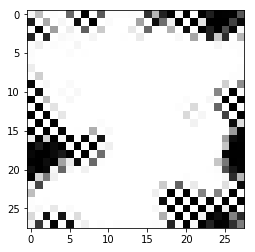

In [194]:
plt.imshow(im_temp.astype(np.float64),cmap='gray')
plt.show() #????????????????????????????????????